# Clustering using Gaussian Mixturre Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


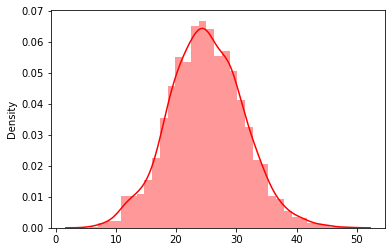

In [9]:
# Creating samples
np.random.seed(100)

X1=np.random.normal(loc=25,scale=6,size=2000)
sns.distplot(X1,color='red',kde=True);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


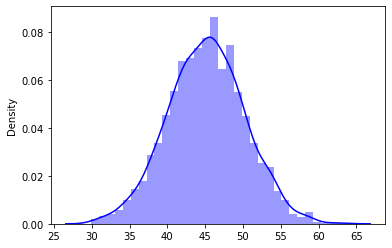

In [10]:
X2=np.random.normal(loc=45,scale=5,size=2000)
sns.distplot(X2,color='blue',kde=True);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


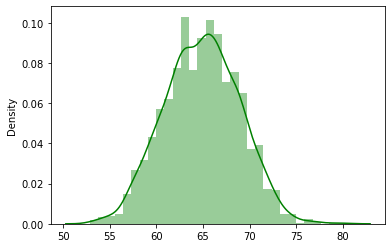

In [11]:
X3=np.random.normal(loc=65,scale=4,size=2000)
sns.distplot(X3,color='green',kde=True);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


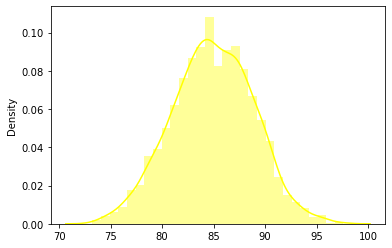

In [12]:
X4=np.random.normal(loc=85,scale=4,size=2000)
sns.distplot(X4,color='yellow',kde=True);

In [13]:
 ## Merging
    
X=np.hstack((X1,X2,X3,X4))
X

array([14.50140716, 27.05608242, 31.91821482, ..., 78.21331852,
       87.58552884, 86.39771956])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


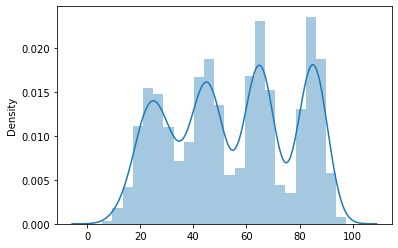

In [14]:
sns.distplot(X,kde=True);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


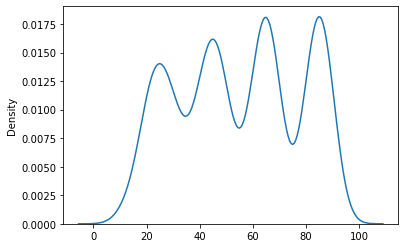

In [15]:
sns.distplot(X,kde=True,hist=False);

In [17]:
# X is a Gaussian Mixture Model

### Building a GMM model with 4 clusters

In [19]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=4,n_init=10)

In [21]:
# Training
gmm.fit(X.reshape(-1,1))

GaussianMixture(n_components=4, n_init=10)

In [22]:
# Prediction
pred=gmm.predict(X.reshape(-1,1))
pred

array([2, 2, 2, ..., 0, 0, 0])

In [23]:
np.unique(pred)

array([0, 1, 2, 3])

In [24]:
gmm.means_

array([[84.93534966],
       [44.98261885],
       [24.76545994],
       [64.81489035]])

In [25]:
gmm.covariances_

array([[[15.4517251 ]],

       [[25.17577479]],

       [[35.10589593]],

       [[17.03908132]]])

In [26]:
np.bincount(pred)

array([1996, 2012, 1969, 2023])

In [27]:
gmm.weights_

array([0.24932829, 0.25099078, 0.24647361, 0.25320731])

### Finding no of clusters

In [28]:
n_components=np.arange(1,11)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(X.reshape(-1,1))
    aic_score=model.aic(X.reshape(-1,1))
    bic_score=model.bic(X.reshape(-1,1))
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)
    

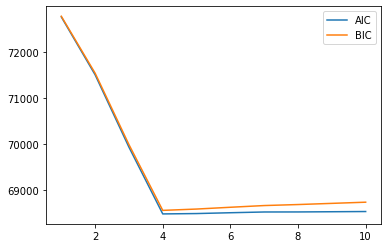

In [29]:
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

#### No of clusters=4

In [30]:
# Generating samples

gmm.sample(100000)

(array([[81.33482621],
        [82.23642966],
        [87.48554884],
        ...,
        [57.64021872],
        [73.06197314],
        [63.13684692]]),
 array([0, 0, 0, ..., 3, 3, 3]))

## Building GMM for the dataset

In [31]:
data=pd.read_csv('gmm_data.csv')

In [32]:
data

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


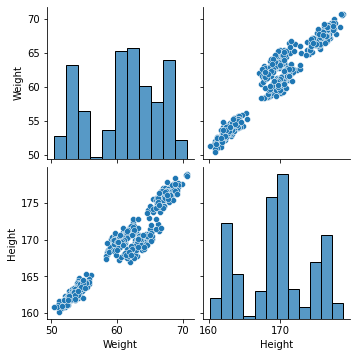

In [34]:
sns.pairplot(data);

### Finding no of clusters

In [35]:
n_components=np.arange(1,11)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(data)
    aic_score=model.aic(data)
    bic_score=model.bic(data)
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

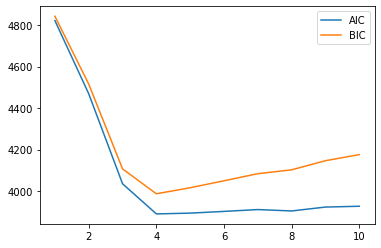

In [36]:
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

#### No of clusters=4

In [38]:
# Model building

gmm_data=GaussianMixture(n_components=4,n_init=10)
gmm_data.fit(data)

GaussianMixture(n_components=4, n_init=10)

In [39]:
data_pred=gmm_data.predict(data)
data_pred

array([3, 3, 2, 2, 3, 1, 1, 2, 2, 0, 1, 3, 1, 0, 2, 2, 3, 2, 0, 2, 2, 3,
       1, 0, 2, 0, 3, 1, 0, 1, 1, 1, 3, 1, 1, 3, 0, 2, 0, 3, 0, 2, 2, 3,
       1, 3, 2, 2, 3, 3, 0, 0, 1, 2, 2, 1, 1, 0, 0, 3, 3, 0, 3, 3, 3, 1,
       2, 3, 2, 1, 0, 2, 0, 3, 0, 3, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0,
       3, 0, 0, 0, 3, 0, 2, 2, 3, 3, 3, 2, 0, 0, 3, 0, 2, 2, 1, 3, 2, 0,
       0, 1, 0, 0, 3, 0, 3, 2, 1, 3, 2, 0, 3, 3, 0, 3, 3, 3, 3, 0, 2, 0,
       1, 0, 0, 0, 2, 3, 2, 1, 3, 3, 3, 3, 1, 0, 2, 2, 1, 0, 0, 3, 2, 2,
       2, 1, 1, 3, 1, 2, 3, 2, 3, 3, 1, 1, 3, 2, 0, 1, 3, 0, 3, 1, 2, 0,
       2, 0, 0, 0, 3, 3, 3, 2, 1, 0, 1, 3, 1, 0, 3, 1, 0, 1, 1, 0, 2, 1,
       2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 3, 3, 2, 3, 1, 0, 0, 0,
       2, 3, 1, 0, 1, 3, 0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 3, 3, 1,
       1, 3, 0, 0, 2, 3, 2, 2, 2, 1, 3, 0, 2, 0, 0, 1, 0, 1, 2, 2, 3, 0,
       3, 3, 2, 2, 0, 3, 2, 0, 3, 1, 3, 0, 1, 1, 2, 3, 3, 2, 3, 1, 3, 1,
       1, 3, 2, 2, 2, 3, 0, 0, 3, 0, 0, 0, 2, 3, 3,

In [40]:
gmm_data.means_

array([[ 53.60032207, 162.76480175],
       [ 63.29340653, 169.26192487],
       [ 60.65965331, 170.03408316],
       [ 67.50985394, 175.97078199]])

In [41]:
gmm_data.covariances_

array([[[1.24923216, 0.95686471],
        [0.95686471, 1.02835817]],

       [[1.56855087, 1.12091738],
        [1.12091738, 1.13465758]],

       [[1.31553487, 0.97514708],
        [0.97514708, 1.08387744]],

       [[1.30109731, 0.97830282],
        [0.97830282, 1.15566526]]])

In [42]:
gmm_data.weights_

array([0.25000038, 0.24867638, 0.25016717, 0.25115608])

## Adding Clsuster labels to DF

In [43]:
data['Label']=data_pred

In [44]:
data

,Weight,Height,Label
0,67.062924,176.086355,3
1,68.804094,178.388669,3
2,60.930863,170.284496,2
3,59.733843,168.691992,2
4,65.431230,173.763679,3
...,...,...,...
495,59.976983,169.679741,2
496,66.423814,174.625574,3
497,53.604698,161.919208,0
498,50.433644,160.794875,0


In [45]:
data['Label'].value_counts()

3    126
2    125
0    125
1    124
Name: Label, dtype: int64

### Visuaise the clusters

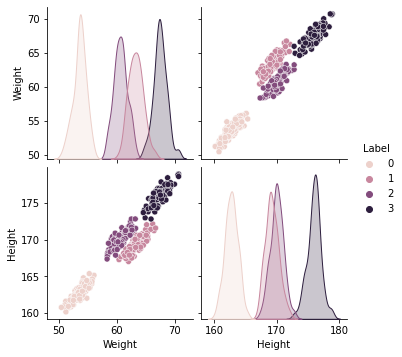

In [46]:
sns.pairplot(data, hue='Label');

Exercise:

Perform GMM on market segmentation dataset.